In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import levene, ttest_ind, pearsonr
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import math
from scipy import stats
import numpy as np
import re
import os
import pandas as pd
import requests
import seaborn as sns
import statsmodels.api as sm
import warnings
import wrangle as w
import re
warnings.filterwarnings("ignore")

In [2]:
sns.set(rc={'figure.figsize':(16,9)})

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df=w.get_explore_data()

In [5]:
df=w.get_contest_data(df)

In [6]:
df.head(50)

region  elevation  lat       lon  startdate  potential_evap  precip  \
0     BSh        200  0.0  0.833333 2014-09-01          237.00   94.31   
1     BSh        200  0.0  0.833333 2014-09-02          228.90  100.85   
2     BSh        200  0.0  0.833333 2014-09-03          220.69  101.25   
3     BSh        200  0.0  0.833333 2014-09-04          225.28  101.90   
4     BSh        200  0.0  0.833333 2014-09-05          237.24   82.95   
5     BSh        200  0.0  0.833333 2014-09-06          237.87   79.11   
6     BSh        200  0.0  0.833333 2014-09-07          236.36   81.54   
7     BSh        200  0.0  0.833333 2014-09-08          233.36   87.87   
8     BSh        200  0.0  0.833333 2014-09-09          233.82   96.14   
9     BSh        200  0.0  0.833333 2014-09-10          229.74   96.13   
10    BSh        200  0.0  0.833333 2014-09-11          220.59   97.86   
11    BSh        200  0.0  0.833333 2014-09-12          208.32   98.12   
12    BSh        200  0.0  0.833333 2014-09-13          198.76   98.15   
13    BSh        200  0.0  0.833333 2014-09-14          196.75   81.58   
14    BSh        200  0.0  0.833333 2014-09-15          195.16   62.01   
15    BSh        200  0.0  0.833333 2014-09-16          195.87   55.46   
16    BSh        200  0.0  0.833333 2014-09-17          197.96   55.68   
17    BSh        200  0.0  0.833333 2014-09-18          201.64   53.94   
18    BSh        200  0.0  0.833333 2014-09-19          201.59   53.94   
19    BSh        200  0.0  0.833333 2014-09-20          204.63   58.25   
20    BSh        200  0.0  0.833333 2014-09-21          216.39   63.28   
21    BSh        200  0.0  0.833333 2014-09-22          228.88   56.04   
22    BSh        200  0.0  0.833333 2014-09-23          230.29   47.77   
23    BSh        200  0.0  0.833333 2014-09-24          232.52   47.77   
24    BSh        200  0.0  0.833333 2014-09-25          238.10   46.11   
25    BSh        200  0.0  0.833333 2014-09-26          246.83   45.85   
26    BSh        200  0.0  0.833333 2014-09-27          265.05   45.82   
27    BSh        200  0.0  0.833333 2014-09-28          272.41   29.65   
28    BSh        200  0.0  0.833333 2014-09-29          271.33   12.95   
29    BSh        200  0.0  0.833333 2014-09-30          283.48   12.99   
30    BSh        200  0.0  0.833333 2014-10-01          295.56   12.37   
31    BSh        200  0.0  0.833333 2014-10-02          296.27   12.04   
32    BSh        200  0.0  0.833333 2014-10-03          296.27   12.04   
33    BSh        200  0.0  0.833333 2014-10-04          302.29    7.72   
34    BSh        200  0.0  0.833333 2014-10-05          297.77    0.18   
35    BSh        200  0.0  0.833333 2014-10-06          284.35    0.56   
36    BSh        200  0.0  0.833333 2014-10-07          274.58    6.23   
37    BSh        200  0.0  0.833333 2014-10-08          263.68    7.96   
38    BSh        200  0.0  0.833333 2014-10-09          251.84   10.98   
39    BSh        200  0.0  0.833333 2014-10-10          239.36   10.98   
40    BSh        200  0.0  0.833333 2014-10-11          226.89   10.98   
41    BSh        200  0.0  0.833333 2014-10-12          228.63   10.98   
42    BSh        200  0.0  0.833333 2014-10-13          237.68   10.91   
43    BSh        200  0.0  0.833333 2014-10-14          233.77   10.87   
44    BSh        200  0.0  0.833333 2014-10-15          225.43   10.87   
45    BSh        200  0.0  0.833333 2014-10-16          217.21   10.87   
46    BSh        200  0.0  0.833333 2014-10-17          208.81   10.87   
47    BSh        200  0.0  0.833333 2014-10-18          199.79   10.98   
48    BSh        200  0.0  0.833333 2014-10-19          203.79   19.03   
49    BSh        200  0.0  0.833333 2014-10-20          216.33   18.65   

    barometric_pressure  all_atmos_precip  relative_humidity  sea_level_press  \
0              98644.97             42.45              81.72        101352.08   
1              98686.80             42.66              82.56      

In [ ]:
df.startdate.max()

In [ ]:
df.startdate.min()

In [ ]:
# Reassign the sale_date column to be a datetime type
df.startdate = pd.to_datetime(df.startdate)

# Set the index as that date and then sort index (by the date)
df = df.set_index("startdate").sort_index()

In [ ]:
df.head()

In [ ]:
df[0].unique()

In [ ]:
df.elevation.nunique()

In [ ]:
df.region.nunique()

In [ ]:
df.columns

In [ ]:
df.lat.nunique()

In [ ]:
df.lon.nunique()

In [ ]:
df.startdate

In [ ]:
df.potential_evap.nunique()

In [ ]:
df.barometric_pressure.nunique()

In [ ]:
df.precip.nunique()

In [ ]:
df.all_atmos_precip.nunique()

In [ ]:
df.relative_humidity.nunique()

In [ ]:
df.sea_level_press.nunique()

In [ ]:
df.columns

In [ ]:
df.height_10_mb.nunique()

In [ ]:
df.height_100_mb.nunique()

In [ ]:
df.height_500_mb.nunique()

In [ ]:
df.height_850_mb.nunique()

In [ ]:
df.zonal_wind_250mb.nunique()

In [ ]:
df.zonal_wind_925mb.nunique()

In [ ]:
df.long_wind_250mb.nunique()

In [ ]:
df.long_wind_925mb.nunique()

In [ ]:
sns.scatterplot(x='height_100_mb', y='mean_temp', hue='region', data= rows)

lat       lon     
0.000000  0.833333    AxesSubplot(0.125,0.125;0.775x0.755)
          0.866667    AxesSubplot(0.125,0.125;0.775x0.755)
0.045455  0.833333    AxesSubplot(0.125,0.125;0.775x0.755)
          0.866667    AxesSubplot(0.125,0.125;0.775x0.755)
          0.900000    AxesSubplot(0.125,0.125;0.775x0.755)
                                      ...                 
1.000000  0.733333    AxesSubplot(0.125,0.125;0.775x0.755)
          0.766667    AxesSubplot(0.125,0.125;0.775x0.755)
          0.800000    AxesSubplot(0.125,0.125;0.775x0.755)
          0.833333    AxesSubplot(0.125,0.125;0.775x0.755)
          0.866667    AxesSubplot(0.125,0.125;0.775x0.755)
Name: mean_temp, Length: 514, dtype: object

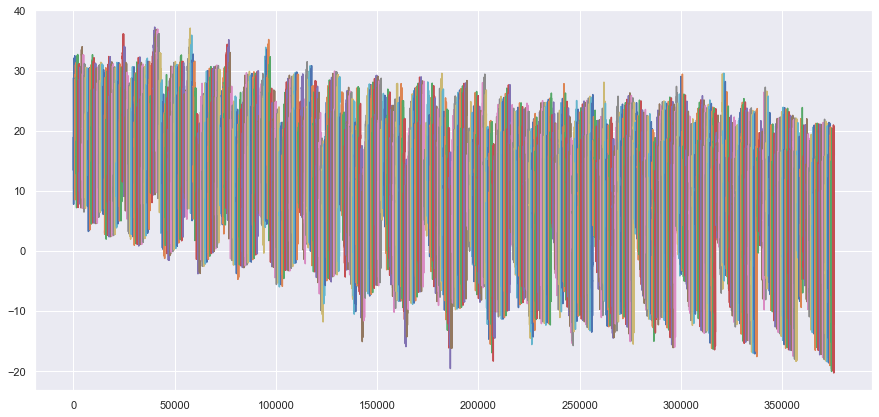

In [7]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['lat','lon'])['mean_temp'].plot(ax=ax)

In [ ]:
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['lat','lon'])['mean_temp'].plot(ax=ax)

In [ ]:
elevation_low_low=df[df.elevation < 500.0]
elevation_low_low.groupby('elevation').mean_temp.mean()
sns.histplot(data=elevation_low_low, x="mean_temp", hue="elevation")

In [8]:
df.lat.lon.groupby('region').mean_temp.mean()
sns.histplot(data=elevation_low_low, x="mean_temp", hue="elevation")

AttributeError: 'Series' object has no attribute 'lon'

In [ ]:
df_region = df.groupby('region')

In [ ]:
df_region.value_counts()

In [ ]:
df_region

In [ ]:
df_lat.lon.value_counts()

In [ ]:
df_lat = df.groupby('lat')

In [ ]:
df_lat.lon.value_counts()

In [ ]:
df_lat.head()

In [ ]:
df.lon.value_counts()


In [ ]:
df_lat.lon.value_counts()

In [ ]:
def split_data(df, test_size=0.15):
    '''
    Takes in a data frame and the train size
    It returns train, validate , and test data frames
    with validate being 0.05 bigger than test and train has the rest of the data.
    '''
    train, test = train_test_split(df, test_size = test_size , random_state=27)
    train, validate = train_test_split(train, test_size = (test_size + 0.05)/(1-test_size), random_state=27)
    
    return train, validate, test

In [9]:
import pandas as pd



# group col1 and col2 based on values in col3
grouped = df.groupby('region')[['lat', 'lon']].value_counts()

print(grouped)


region  lat       lon     
BSh     0.000000  0.833333    731
        0.136364  0.733333    731
        0.227273  0.433333    731
                  0.400000    731
        0.181818  0.766667    731
                             ... 
Dsc     0.772727  0.300000    731
        0.454545  0.166667    731
Dwa     0.727273  0.766667    731
                  0.733333    731
Dwb     0.863636  0.700000    731
Length: 514, dtype: int64


In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

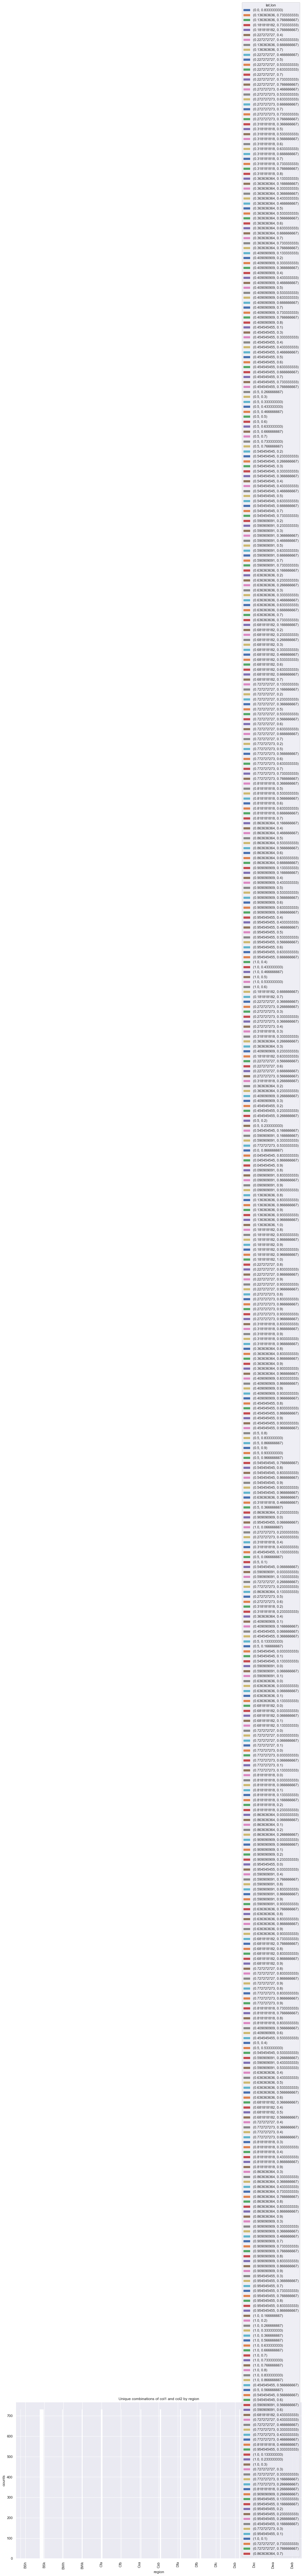

In [10]:
import pandas as pd
import matplotlib.pyplot as plt



# group col1 and col2 based on values in col3 and count the unique combinations
grouped = df.groupby(['region', 'lat', 'lon']).size().reset_index(name='counts')

# pivot the data to make it easier to plot
grouped = grouped.pivot(index='region', columns=['lat', 'lon'], values='counts')

# plot the data
grouped.plot(kind='bar')
plt.xlabel('region')
plt.ylabel('counts')
plt.title('Unique combinations of col1 and col2 by region')
plt.show()


<AxesSubplot:xlabel='region', ylabel='count'>

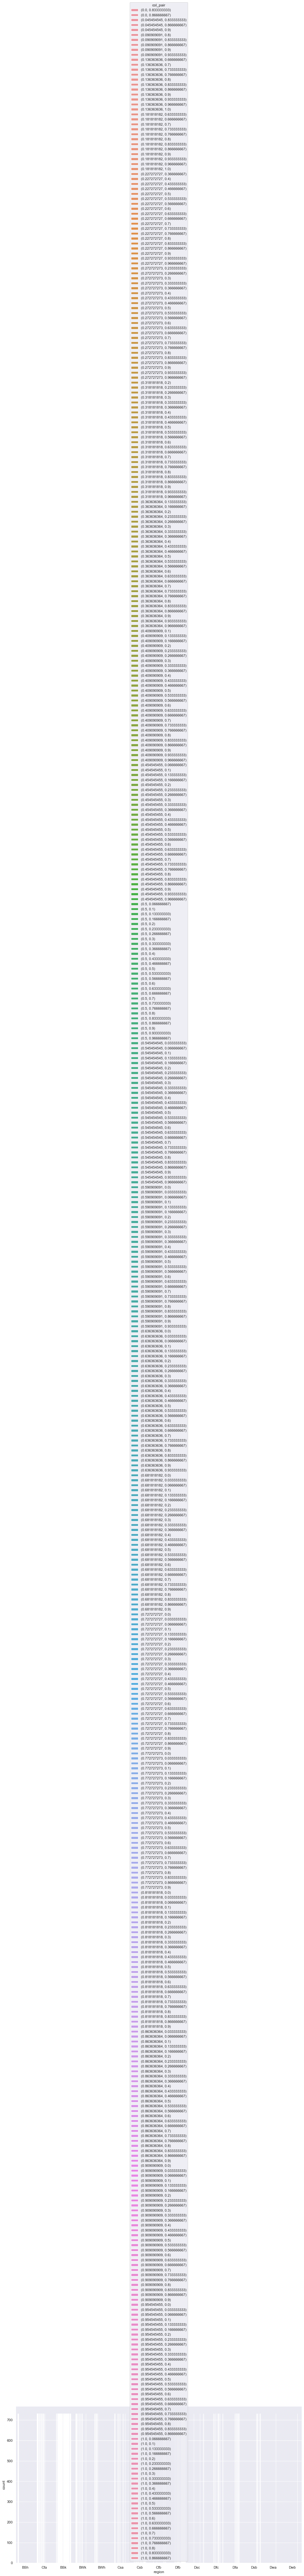

In [11]:
import pandas as pd
import seaborn as sns


# create a new column for the unique combination of col1 and col2
df['col_pair'] = df[['lat', 'lon']].apply(tuple, axis=1)

# plot the data using Seaborn's countplot
sns.countplot(x='region', hue='col_pair', data=df)


In [13]:
import pandas as pd



# group col1 and col2 based on values in col3 and count the unique combinations
grouped = df.groupby(['region', 'lat', 'lon']).size().reset_index(name='counts')

# pivot the data to make it easier to display
#grouped = grouped.pivot(index='region', columns=['lat', 'lon'], values='counts').fillna(0)


In [43]:
df[[df.region == 'BSh'] & [df.lat == 0.000000] & [df.lon == 0.833333]].mean_temp.mean()  

TypeError: unsupported operand type(s) for &: 'list' and 'list'

In [14]:
grouped

region       lat       lon  counts
0      BSh  0.000000  0.833333     731
1      BSh  0.136364  0.733333     731
2      BSh  0.136364  0.766667     731
3      BSh  0.181818  0.733333     731
4      BSh  0.181818  0.766667     731
..     ...       ...       ...     ...
509    Dsc  0.954545  0.100000     731
510    Dsc  1.000000  0.100000     731
511    Dwa  0.727273  0.733333     731
512    Dwa  0.727273  0.766667     731
513    Dwb  0.863636  0.700000     731

[514 rows x 4 columns]

In [54]:
df_BSh = grouped[grouped.region == 'BSh']
df_BSh.mean_temp.mean()

AttributeError: 'DataFrame' object has no attribute 'mean_temp'

In [53]:
df_BSh = grouped[grouped.region == 'BSh']
df_BSh_mean = df_BSh['mean_temp'].mean()
df_BSh_mean

KeyError: 'mean_temp'

In [51]:
df_grouped = df.groupby(['region', 'lat', 'lon'], as_index=False).mean()
mean_temp_mean = df_grouped['mean_temp'].mean()


In [52]:
mean_temp_mean

11.85856822064842

In [ ]:

# filter Rows Based on condition
df[df["Courses"] == 'Spark'] 
df.loc[df['Courses'] == value]
df.query("Courses == 'Spark'")
df.loc[df['Courses'] != 'Spark']
df.loc[df['Courses'].isin(values)]
df.loc[~df['Courses'].isin(values)]

# filter Multiple Conditions using Multiple Columns
df.loc[(df['Discount'] >= 1000) & (df['Discount'] <= 2000)]
df.loc[(df['Discount'] >= 1200) & (df['Fee'] >= 23000 )]

# Using lambda function
df.apply(lambda row: row[df['Courses'].isin(['Spark','PySpark'])])

# filter columns that have no None & nana values
df.dropna()

# Other examples
df[df['Courses'].str.contains("Spark")]
df[df['Courses'].str.lower().str.contains("spark")]
df[df['Courses'].str.startswith("P")]


In [55]:
df_BSh = df[df['region'] == 'BSh']
df_grouped = df_BSh.groupby(['lat', 'lon'], as_index=False).mean()
mean_temp_mean = df_grouped['mean_temp'].mean()


In [56]:
mean_temp_mean

20.88323988347469

Yes, certainly! Here is a step-by-step explanation of this code:

df_BSh = df[df['region'] == 'BSh']: This line filters the dataframe to only include the rows where the 'region' column has the value 'BSh'.

grouped = df_BSh.groupby(['lat', 'lon'], as_index=False): This line groups the filtered dataframe by the unique values of the 'lat' and 'lon' columns. The as_index=False argument ensures that the resulting groups are not used as the index of the grouped dataframe.

mean_temps = []: This line creates an empty list that will be used to store the mean of the 'mean_temp' column for each group.

for name, group in grouped:: This line starts a for loop that iterates through the groups generated in step 2. For each iteration, name is a tuple representing the values of 'lat' and 'lon' for the current group, and group is a dataframe representing the rows in df_BSh that belong to the current group.

mean_temp = group['mean_temp'].mean(): This line calculates the mean of the 'mean_temp' column for the current group.

mean_temps.append(mean_temp): This line adds the mean from step 5 to the mean_temps list.

`mean_temp_mean = sum(mean_temps)/len(mean_temps)




In [62]:
df_BSh = df[df['region'] == 'BSh']
grouped = df_BSh.groupby(['lat', 'lon'], as_index=False)
BShmean_temps = []
for name, group in grouped:
    mean_temp = group['mean_temp'].mean()
    BShmean_temps.append(mean_temp)

BShmean_temp_mean = sum(BShmean_temps)/len(BShmean_temps)
BShmean_temps

In [63]:
BShmean_temp_mean

20.883239883474698

In [64]:
BShmean_temps

[23.474872635788,
 20.481732276998635,
 20.625190082191523,
 19.466429463610126,
 19.318327270322857,
 22.673413290171005,
 20.14271416524077]

In [16]:
df_BWk = grouped[grouped.region == 'BWk']
df_BWk

region       lat       lon  counts
211    BWk  0.181818  0.633333     731
212    BWk  0.227273  0.566667     731
213    BWk  0.227273  0.600000     731
214    BWk  0.227273  0.666667     731
215    BWk  0.272727  0.566667     731
216    BWk  0.318182  0.266667     731
217    BWk  0.363636  0.200000     731
218    BWk  0.363636  0.233333     731
219    BWk  0.409091  0.266667     731
220    BWk  0.409091  0.300000     731
221    BWk  0.454545  0.200000     731
222    BWk  0.454545  0.233333     731
223    BWk  0.454545  0.266667     731
224    BWk  0.500000  0.200000     731
225    BWk  0.500000  0.233333     731
226    BWk  0.545455  0.166667     731
227    BWk  0.590909  0.166667     731
228    BWk  0.590909  0.333333     731
229    BWk  0.772727  0.533333     731

In [65]:
df_BWk = df[df['region'] == 'BWk']
grouped = df_BWk.groupby(['lat', 'lon'], as_index=False)
BWkmean_temps = []
for name, group in grouped:
    mean_temp = group['mean_temp'].mean()
    BWkmean_temps.append(mean_temp)

BWkmean_temp_mean = sum(BWkmean_temps)/len(BWkmean_temps)

In [66]:
BWkmean_temp_mean

15.86592173290604

In [67]:
BWkmean_temps

[17.471979537712723,
 17.412358761161432,
 17.4918458921108,
 17.76770976898223,
 15.77985827491656,
 21.003315294265384,
 17.20237175604652,
 18.93673210927084,
 19.510227388196974,
 20.818775490984937,
 13.210203945333797,
 17.10410796561013,
 15.627319612321461,
 12.413434860383033,
 12.686111319570443,
 13.539671067474693,
 13.171627483875515,
 11.181024074240764,
 9.123838322756503]

In [17]:
df_BWh = grouped[grouped.region == 'BWh']
df_BWh

region       lat       lon  counts
198    BWh  0.181818  0.666667     731
199    BWh  0.181818  0.700000     731
200    BWh  0.227273  0.366667     731
201    BWh  0.272727  0.266667     731
202    BWh  0.272727  0.300000     731
203    BWh  0.272727  0.333333     731
204    BWh  0.272727  0.366667     731
205    BWh  0.272727  0.400000     731
206    BWh  0.318182  0.300000     731
207    BWh  0.318182  0.333333     731
208    BWh  0.363636  0.266667     731
209    BWh  0.363636  0.300000     731
210    BWh  0.409091  0.233333     731

In [68]:
df_BWh = df[df['region'] == 'BWh']
grouped = df_BWh.groupby(['lat', 'lon'], as_index=False)
BWhmean_temps = []
for name, group in grouped:
    mean_temp = group['mean_temp'].mean()
    BWhmean_temps.append(mean_temp)

BWhmean_temp_mean = sum(BWhmean_temps)/len(BWhmean_temps)
BWhmean_temp_mean
BWhmean_temps

[16.687644849172376,
 18.80927620405335,
 25.006776957578655,
 21.8310859101532,
 24.873828802980842,
 24.643756322087537,
 24.871275758792056,
 23.937737858697652,
 23.43481378635158,
 22.640651955486998,
 21.068184705175103,
 21.058631054742825,
 19.684905204082106]

In [69]:
BWhmean_temp_mean

22.196043797642634

In [ ]:
df_BWh = df[df['region'] == 'BWh']
grouped = df_BWh.groupby(['lat', 'lon'], as_index=False)
BWhmean_temps = []
for name, group in grouped:
    mean_temp = group['mean_temp'].mean()
    BWhmean_temps.append(mean_temp)

BWhmean_temp_mean = sum(BWhmean_temps)/len(BWhmean_temps)
BWhmean_temp_mean
BWhmean_temps

In [19]:
df_BSk = grouped[grouped.region == 'BSk']
df_BSk

region       lat       lon  counts
7      BSk  0.136364  0.666667     731
8      BSk  0.136364  0.700000     731
9      BSk  0.227273  0.466667     731
10     BSk  0.227273  0.500000     731
11     BSk  0.227273  0.533333     731
..     ...       ...       ...     ...
193    BSk  1.000000  0.433333     731
194    BSk  1.000000  0.466667     731
195    BSk  1.000000  0.500000     731
196    BSk  1.000000  0.533333     731
197    BSk  1.000000  0.600000     731

[191 rows x 4 columns]

In [72]:
df_BSk = df[df['region'] == 'BSk']
grouped = df_BSk.groupby(['lat', 'lon'], as_index=False)
BSkmean_temps = []
for name, group in grouped:
    mean_temp = group['mean_temp'].mean()
    BSkmean_temps.append(mean_temp)

BSkmean_temp_mean = sum(BSkmean_temps)/len(BSkmean_temps)

BSkmean_temps

[17.32956158674144,
 18.266095211837197,
 18.612120161849507,
 16.57160168981671,
 16.25761934774966,
 16.527370028889187,
 18.383523932077992,
 18.691953034209316,
 18.74148627439674,
 16.827128429757884,
 12.244822012015057,
 14.62740341695895,
 16.531370069351567,
 16.853474109387133,
 17.34958092016689,
 17.95468555955132,
 20.252491144051966,
 9.242924917991786,
 10.35754911989603,
 14.342686155188803,
 12.787855065607374,
 13.88832387929822,
 15.38475643254993,
 15.534089814489729,
 15.952436756611492,
 16.661469115199747,
 17.591666995392618,
 15.37286765990287,
 16.77357054633516,
 18.843507140939828,
 14.216904108993155,
 12.251651362852257,
 12.817921212151841,
 11.086259233969901,
 9.92890854805336,
 13.209221083595073,
 12.147654831529408,
 13.105087801038303,
 14.598678948001371,
 15.048704024073878,
 15.081083678213401,
 15.77302596108756,
 17.63540820732286,
 13.868883165432276,
 18.0382249781847,
 13.530004843570449,
 11.877534963351588,
 13.085333135205206,
 11.3365159

In [20]:
df_Csa = grouped[grouped.region == 'Csa']
df_Csa

region       lat       lon  counts
307    Csa  0.272727  0.233333     731
308    Csa  0.272727  0.433333     731
309    Csa  0.318182  0.400000     731
310    Csa  0.318182  0.433333     731
311    Csa  0.454545  0.133333     731
312    Csa  0.500000  0.066667     731
313    Csa  0.500000  0.100000     731
314    Csa  0.545455  0.066667     731
315    Csa  0.590909  0.033333     731
316    Csa  0.590909  0.133333     731
317    Csa  0.727273  0.266667     731
318    Csa  0.772727  0.233333     731
319    Csa  0.863636  0.133333     731

In [21]:
df_Csb = grouped[grouped.region == 'Csb']
df_Csb

region       lat       lon  counts
320    Csb  0.272727  0.500000     731
321    Csb  0.272727  0.600000     731
322    Csb  0.318182  0.200000     731
323    Csb  0.318182  0.233333     731
324    Csb  0.363636  0.400000     731
325    Csb  0.409091  0.100000     731
326    Csb  0.409091  0.166667     731
327    Csb  0.454545  0.066667     731
328    Csb  0.454545  0.366667     731
329    Csb  0.500000  0.133333     731
330    Csb  0.500000  0.166667     731
331    Csb  0.545455  0.033333     731
332    Csb  0.545455  0.100000     731
333    Csb  0.545455  0.133333     731
334    Csb  0.590909  0.000000     731
335    Csb  0.590909  0.066667     731
336    Csb  0.590909  0.100000     731
337    Csb  0.636364  0.000000     731
338    Csb  0.636364  0.033333     731
339    Csb  0.636364  0.066667     731
340    Csb  0.636364  0.100000     731
341    Csb  0.636364  0.133333     731
342    Csb  0.681818  0.000000     731
343    Csb  0.681818  0.033333     731
344    Csb  0.681818  0.066667     731
345    Csb  0.681818  0.100000     731
346    Csb  0.681818  0.133333     731
347    Csb  0.727273  0.000000     731
348    Csb  0.727273  0.033333     731
349    Csb  0.727273  0.066667     731
350    Csb  0.727273  0.100000     731
351    Csb  0.772727  0.000000     731
352    Csb  0.772727  0.033333     731
353    Csb  0.772727  0.066667     731
354    Csb  0.772727  0.100000     731
355    Csb  0.772727  0.133333     731
356    Csb  0.818182  0.000000     731
357    Csb  0.818182  0.033333     731
358    Csb  0.818182  0.066667     731
359    Csb  0.818182  0.100000     731
360    Csb  0.818182  0.133333     731
361    Csb  0.818182  0.166667     731
362    Csb  0.818182  0.200000     731
363    Csb  0.818182  0.233333     731
364    Csb  0.863636  0.033333     731
365    Csb  0.863636  0.066667     731
366    Csb  0.863636  0.100000     731
367    Csb  0.863636  0.200000     731
368    Csb  0.863636  0.266667     731
369    Csb  0.909091  0.033333     731
370    Csb  0.909091  0.066667     731
371    Csb  0.909091  0.100000     731
372    Csb  0.909091  0.200000     731
373    Csb  0.909091  0.233333     731
374    Csb  0.954545  0.000000     731
375    Csb  0.954545  0.033333     731

In [22]:
df_Cfa = grouped[grouped.region == 'Cfa']
df_Cfa

region       lat       lon  counts
230    Cfa  0.000000  0.866667     731
231    Cfa  0.045455  0.833333     731
232    Cfa  0.045455  0.866667     731
233    Cfa  0.045455  0.900000     731
234    Cfa  0.090909  0.800000     731
..     ...       ...       ...     ...
296    Cfa  0.545455  0.866667     731
297    Cfa  0.545455  0.900000     731
298    Cfa  0.545455  0.933333     731
299    Cfa  0.545455  0.966667     731
300    Cfa  0.636364  0.366667     731

[71 rows x 4 columns]

In [23]:
df_Cfb = grouped[grouped.region == 'Cfb']
df_Cfb

region       lat       lon  counts
301    Cfb  0.318182  0.466667     731
302    Cfb  0.500000  0.366667     731
303    Cfb  0.863636  0.233333     731
304    Cfb  0.909091  0.000000     731
305    Cfb  0.954545  0.066667     731
306    Cfb  1.000000  0.066667     731

In [24]:
df_Dsb = grouped[grouped.region == 'Dsb']
df_Dsb

region       lat       lon  counts
496    Dsb  0.727273  0.300000     731
497    Dsb  0.727273  0.333333     731
498    Dsb  0.772727  0.166667     731
499    Dsb  0.772727  0.266667     731
500    Dsb  0.818182  0.266667     731
501    Dsb  0.909091  0.266667     731
502    Dsb  0.954545  0.133333     731
503    Dsb  0.954545  0.166667     731
504    Dsb  0.954545  0.200000     731
505    Dsb  0.954545  0.233333     731
506    Dsb  0.954545  0.266667     731

In [25]:
df_Dsc = grouped[grouped.region == 'Dsc']
df_Dsc

region       lat       lon  counts
507    Dsc  0.454545  0.166667     731
508    Dsc  0.772727  0.300000     731
509    Dsc  0.954545  0.100000     731
510    Dsc  1.000000  0.100000     731

In [26]:
df_Dwa = grouped[grouped.region == 'Dwa']
df_Dwa

region       lat       lon  counts
511    Dwa  0.727273  0.733333     731
512    Dwa  0.727273  0.766667     731

In [27]:
df_Dwb = grouped[grouped.region == 'Dwb']
df_Dwb

region       lat  lon  counts
513    Dwb  0.863636  0.7     731

In [28]:
df_Dfa = grouped[grouped.region == 'Dfa']
df_Dfa

region       lat       lon  counts
376    Dfa  0.590909  0.400000     731
377    Dfa  0.590909  0.766667     731
378    Dfa  0.590909  0.800000     731
379    Dfa  0.590909  0.833333     731
380    Dfa  0.590909  0.866667     731
381    Dfa  0.590909  0.900000     731
382    Dfa  0.590909  0.933333     731
383    Dfa  0.636364  0.766667     731
384    Dfa  0.636364  0.800000     731
385    Dfa  0.636364  0.833333     731
386    Dfa  0.636364  0.866667     731
387    Dfa  0.636364  0.900000     731
388    Dfa  0.636364  0.933333     731
389    Dfa  0.681818  0.733333     731
390    Dfa  0.681818  0.766667     731
391    Dfa  0.681818  0.800000     731
392    Dfa  0.681818  0.833333     731
393    Dfa  0.681818  0.866667     731
394    Dfa  0.681818  0.900000     731
395    Dfa  0.727273  0.800000     731
396    Dfa  0.727273  0.833333     731
397    Dfa  0.727273  0.866667     731
398    Dfa  0.727273  0.900000     731
399    Dfa  0.772727  0.800000     731
400    Dfa  0.772727  0.833333     731
401    Dfa  0.772727  0.866667     731
402    Dfa  0.772727  0.900000     731
403    Dfa  0.818182  0.733333     731
404    Dfa  0.818182  0.766667     731
405    Dfa  0.818182  0.800000     731
406    Dfa  0.818182  0.833333     731

In [29]:
df_Dfb = grouped[grouped.region == 'Dfb']
df_Dfb

region       lat       lon  counts
407    Dfb  0.409091  0.566667     731
408    Dfb  0.409091  0.600000     731
409    Dfb  0.454545  0.533333     731
410    Dfb  0.500000  0.400000     731
411    Dfb  0.500000  0.533333     731
..     ...       ...       ...     ...
474    Dfb  1.000000  0.733333     731
475    Dfb  1.000000  0.766667     731
476    Dfb  1.000000  0.800000     731
477    Dfb  1.000000  0.833333     731
478    Dfb  1.000000  0.866667     731

[72 rows x 4 columns]

In [30]:
df_Dfc = grouped[grouped.region == 'Dfc']
df_Dfc

region       lat       lon  counts
479    Dfc  0.454545  0.566667     731
480    Dfc  0.500000  0.566667     731
481    Dfc  0.545455  0.566667     731
482    Dfc  0.545455  0.600000     731
483    Dfc  0.590909  0.566667     731
484    Dfc  0.590909  0.600000     731
485    Dfc  0.681818  0.433333     731
486    Dfc  0.727273  0.433333     731
487    Dfc  0.727273  0.466667     731
488    Dfc  0.772727  0.333333     731
489    Dfc  0.772727  0.433333     731
490    Dfc  0.772727  0.466667     731
491    Dfc  0.818182  0.466667     731
492    Dfc  0.954545  0.333333     731
493    Dfc  1.000000  0.133333     731
494    Dfc  1.000000  0.233333     731
495    Dfc  1.000000  0.300000     731

<AxesSubplot:xlabel='lat', ylabel='lon'>

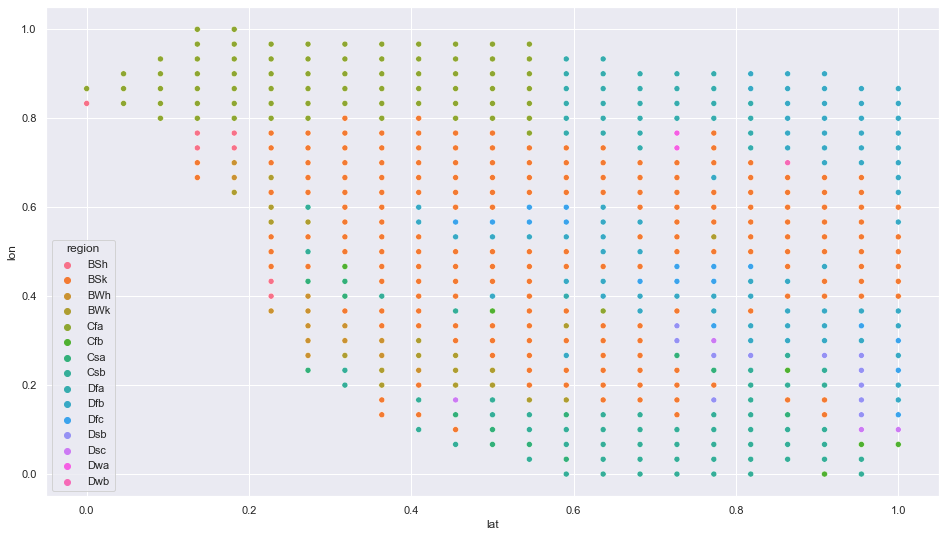

In [31]:
sns.scatterplot(data=grouped, x="lat", y="lon", hue="region")

In [ ]:
plot.figure(figsize = (16,9))
plot_axes = plot.axes(projection = '3d')

In [ ]:
print(type(plot_axes))
plot_axes.scatter3D(x1, y1, z1)

In [ ]:
plot_axes.set_xlabel('x')
plot_axes.set_ylabel('y')
plot_axes.set_zlabel('z')
plot.show()

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


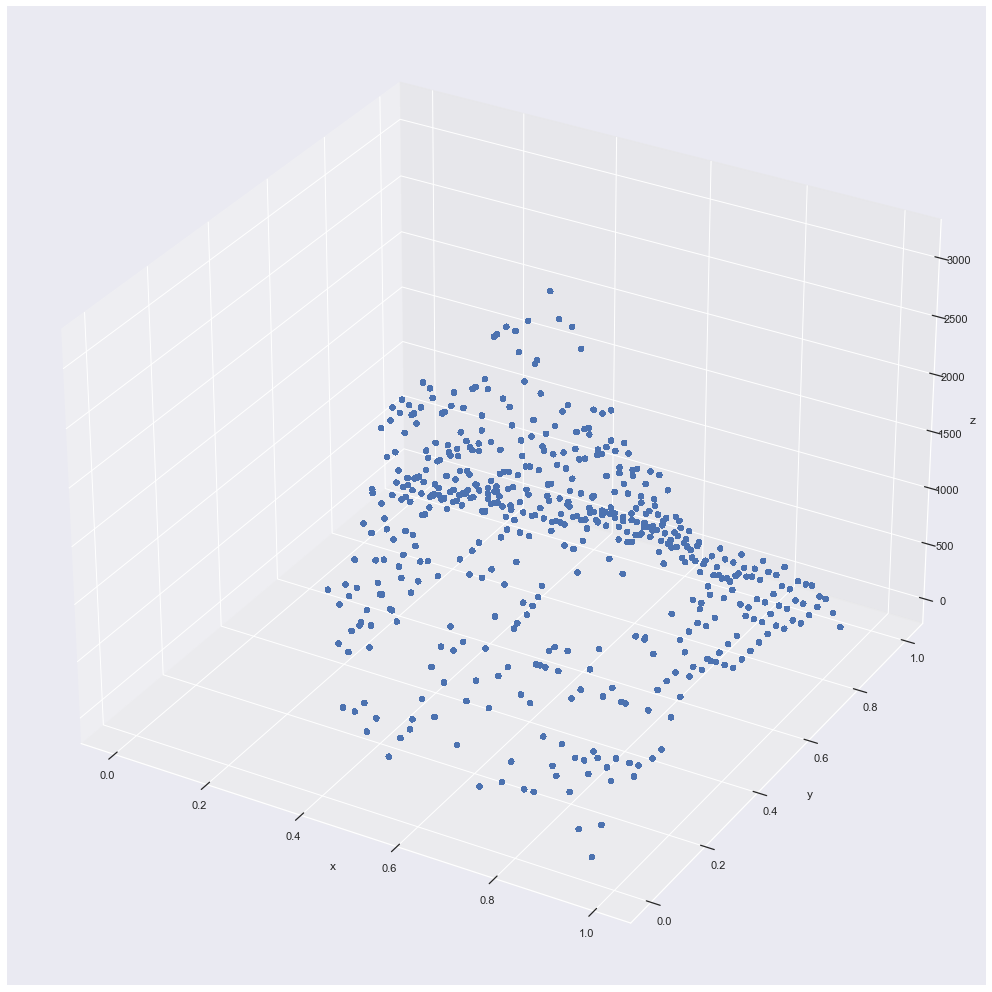

In [40]:
plot1 = df.lat
plot2 = df.lon
plot3 = df.elevation
plt.figure (figsize = (32,18))
seaborn_plot = plt.axes (projection='3d')
print (type (seaborn_plot))
seaborn_plot.scatter3D (plot1, plot2, plot3)
seaborn_plot.set_xlabel ('x')
seaborn_plot.set_ylabel ('y')
seaborn_plot.set_zlabel ('z')
plt.show ()

In [37]:
df.elevation.max()

3100

In [ ]:
3100m Colorado

In [38]:
df.elevation.unique()

array([ 200,    0,   90,  400,  300,  100,   50, 1000,  700,  500,  600,
         80,   60,  800,  750, 1200, 1700, 1100,  900,  350,  430, 2000,
       1800, 1900,  570, 2200, 1500, 1300, 2100, 1400, 1050,  890, 1600,
       2500,  260, 2300, 2700, 2600, 2800, 2400, 3100, 1250, 2850,  780,
       1150,  850,  370,  480,  560,  490,  320])

In [ ]:
,    0,   50, 60,  80,90,  100,
200,
300,
400,         700,    
500,            750,       350,  430, 
600,         570,   1050,  890, 1600,
700,   2500,  260, 2300, 2700, 2600, 2800, 2400, 3100, 1250, 2850,  780,
800,       1150,  850,  370,  480,  560,  490,  320])
900,
1000,
1100,
1200,
1300,
1400,
1500,
1600,
1700,
1800, 
1900,
2000,
2100,
2200,





